# Credit Card Fraud Detection Using Logistic Regression and RandomForest Classifier

## Importing packages required for this project.

In [1]:
##import required packages

import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Creating a DataFrame

In [2]:
##load dataset in dataframe

df = pd.read_csv('/Users/SamWarwick/Downloads/creditcard_2023.csv')

## Exploratory Data Analysis (EDA) 

In [3]:
df.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-1.109271e-14,-3.429498e-14,-1.209242e-14,3.825991e-15,6.288281e-15,-2.751174e-14,1.240002e-14,8.208047e-15,-1.002980e-14,...,2.210679e-15,-8.767441e-16,4.376179e-16,6.825608e-16,2.545689e-15,1.781906e-15,2.817586e-15,2.891419e-15,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')

There are 568630 rows and 31 columns in the dataset


### Preparing data for cleaning if necessary (removing or altering null/NaN values or features that will have no significance in the model)

In [7]:
result_list = []

for column in df.columns:
    uniqueVals = df[column].unique()
    if len(uniqueVals) == len(df):
        result_list.append("Column: " + column + " has a unique value for each row in the dataset")
    else:
        result_list.append(column + " does not have a unique value for each row -- do not remove")

result_list.sort()

for result in result_list:
    print(result)

Amount does not have a unique value for each row -- do not remove
Class does not have a unique value for each row -- do not remove
Column: id has a unique value for each row in the dataset
V1 does not have a unique value for each row -- do not remove
V10 does not have a unique value for each row -- do not remove
V11 does not have a unique value for each row -- do not remove
V12 does not have a unique value for each row -- do not remove
V13 does not have a unique value for each row -- do not remove
V14 does not have a unique value for each row -- do not remove
V15 does not have a unique value for each row -- do not remove
V16 does not have a unique value for each row -- do not remove
V17 does not have a unique value for each row -- do not remove
V18 does not have a unique value for each row -- do not remove
V19 does not have a unique value for each row -- do not remove
V2 does not have a unique value for each row -- do not remove
V20 does not have a unique value for each row -- do not r

### We saw that the feature, 'id' is irrelavant to a classification or any predictive model as it contains a unique value for every column in the dataset. We can drop the 'id' column.

In [8]:
##id is irrelevant to any prediction model
df = df.drop('id', axis=1)

In [9]:
##Check for duplicate entries and drop if true
df.duplicated().any()

if df.duplicated().any:
    df = df.drop_duplicates()
    
    
df.duplicated().any()    

False

In [10]:
##Check for missing values and print the list of features with missing values
##Filter features with missing values
null_attributes = df.isna().sum()
null_attributes = null_attributes[null_attributes > 0]  

if null_attributes.empty:
    print("No missing values in any attribute.")
else:
    print("Attributes with missing values:")
    for attribute, count in null_attributes.items():
        print(f"{attribute}: {count} missing values")

No missing values in any attribute.


### Next we can begin to visualize the dataset better, by looking at the distribution of each remaining features values. We can do this using boxplots to examine how each features values are distributed around their respective means. We can also visualize if features have any extreme outliers.

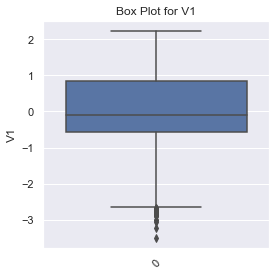

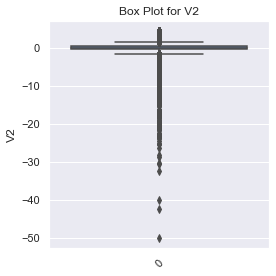

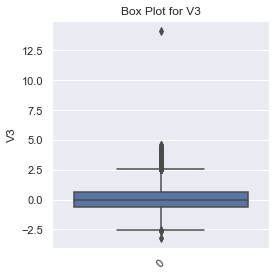

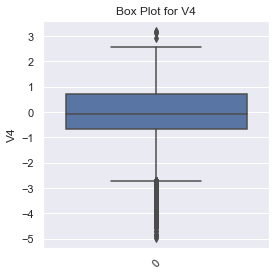

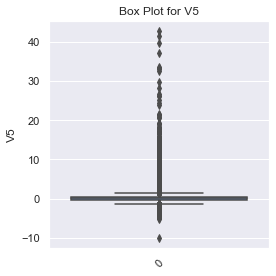

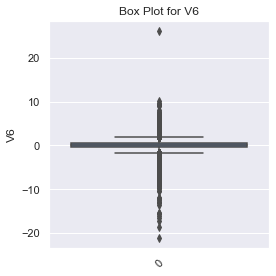

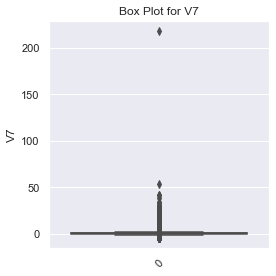

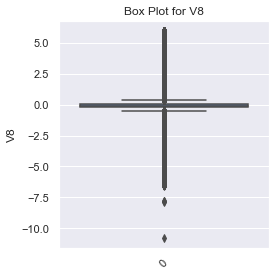

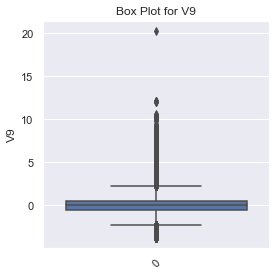

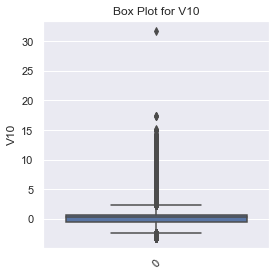

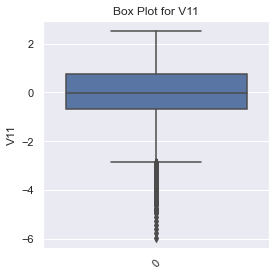

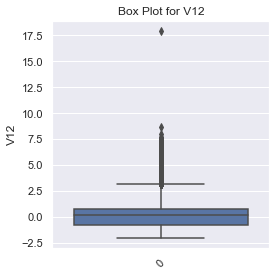

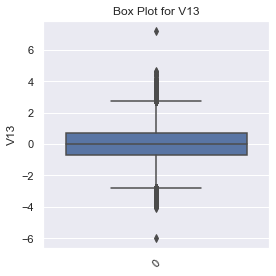

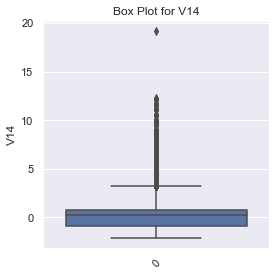

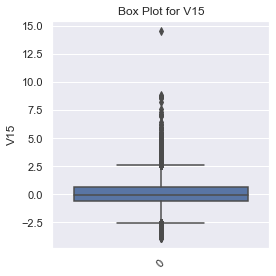

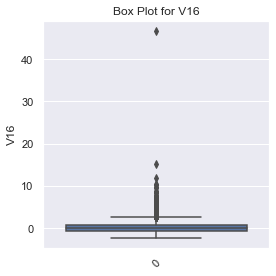

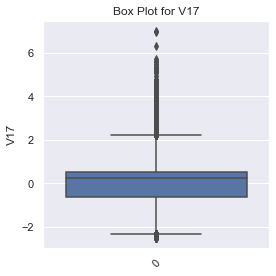

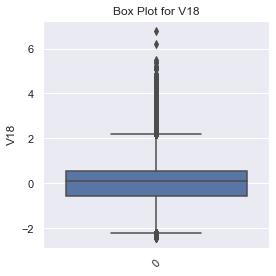

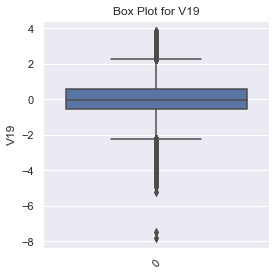

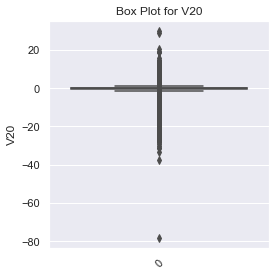

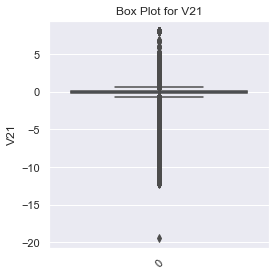

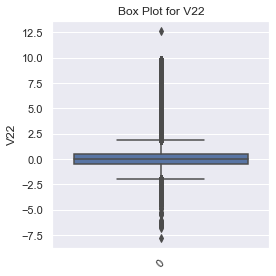

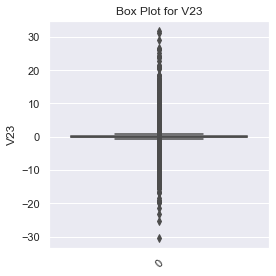

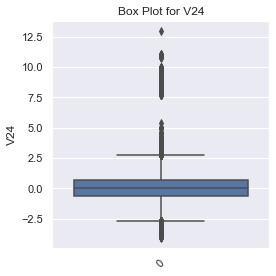

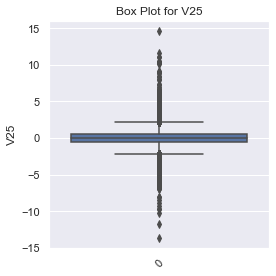

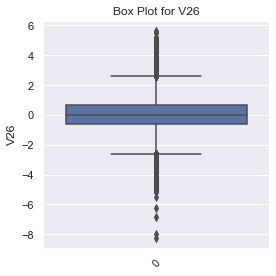

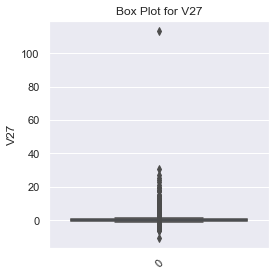

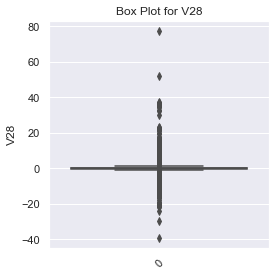

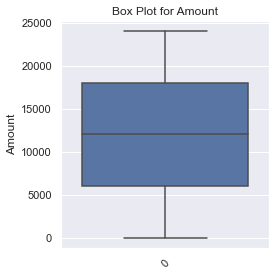

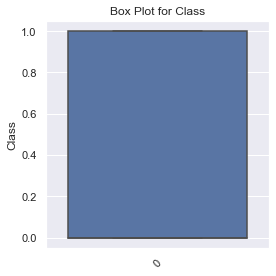

In [11]:
##Visualizing each feature's value distribution with boxplots
sns.set(style="darkgrid")

## Loop through each feature and create a box plot
for column in df.columns:
    plt.figure(figsize=(4, 4))  
    sns.boxplot(data=df[column])
    plt.title(f"Box Plot for {column}")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### A quick way to determine the distribution of each feature is to look at its skewness. We can determine each features skew and print the results in order from most positively skewed to most negatively skewed.

In [12]:
##Evaluating attribute skew for right and left skew of feature distribution
skewness = df.skew() 

##Filter and sort skewness for positive/right skew
positive_skew = skewness[skewness > 0].sort_values(ascending=False)

##Filter and sort skewness for negative/left skew
negative_skew = skewness[skewness < 0].sort_values()

##Print results rounded to thousandth for readability
print("Features with positive/right skewness, sorted by most extreme values:")
print(positive_skew.round(3))

print("\Features with negative/left skewness, sorted by most extreme values:")
print(negative_skew.round(3))

Features with positive/right skewness, sorted by most extreme values:
V7        19.027
V27        2.755
V28        1.725
V5         1.506
V10        0.740
V17        0.373
V22        0.319
V8         0.300
V16        0.266
V14        0.208
V9         0.171
V18        0.129
V12        0.067
V24        0.066
V25        0.023
V13        0.015
V3         0.015
V15        0.011
Amount     0.002
Class      0.000
dtype: float64
\Features with negative/left skewness, sorted by most extreme values:
V20   -1.556
V2    -1.398
V6    -0.202
V21   -0.110
V23   -0.100
V1    -0.083
V4    -0.044
V11   -0.021
V26   -0.019
V19   -0.010
dtype: float64


#### Observation: only 6 features are highly skewed (abs val > 1) with one feature, V7 being extremely right skewed 

In [13]:
##Dealing with outliers
##Identify and remove any extreme outliers in the data to avoid model over/underfitting

##Loop through each feature and detect outliers
for column in df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Feature: {column}")
    print("Number of potential outliers:", outliers.shape[0])

Feature: V1
Number of potential outliers: 30
Feature: V2
Number of potential outliers: 43619
Feature: V3
Number of potential outliers: 4300
Feature: V4
Number of potential outliers: 2766
Feature: V5
Number of potential outliers: 71015
Feature: V6
Number of potential outliers: 48853
Feature: V7
Number of potential outliers: 55996
Feature: V8
Number of potential outliers: 93855
Feature: V9
Number of potential outliers: 18939
Feature: V10
Number of potential outliers: 10710
Feature: V11
Number of potential outliers: 709
Feature: V12
Number of potential outliers: 700
Feature: V13
Number of potential outliers: 4197
Feature: V14
Number of potential outliers: 1089
Feature: V15
Number of potential outliers: 6780
Feature: V16
Number of potential outliers: 4546
Feature: V17
Number of potential outliers: 14890
Feature: V18
Number of potential outliers: 16678
Feature: V19
Number of potential outliers: 19519
Feature: V20
Number of potential outliers: 65707
Feature: V21
Number of potential outliers:

### Considering the volume of outliers detected, we'll proceed leaving them in and then reassess once iteration 1 of the classficaiton model is completed if the accuracy is not at an acceptable level (I'd like to see at least 95%)

### Next we'll begin by visualizing the amounts feature - using a violin plot from the seaborn package and a count plot to visualize the number of fraud and not fraudulent purchases in this dataset

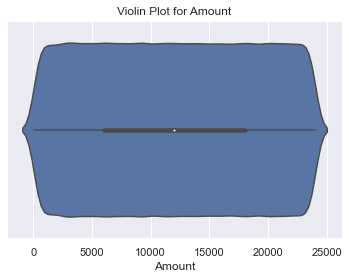

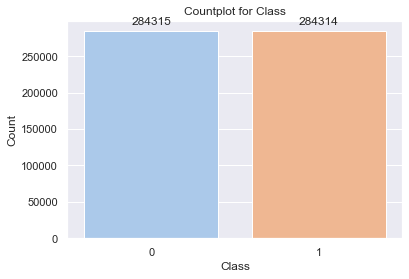

In [14]:
##Violin
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Amount'])
plt.title('Violin Plot for Amount')
plt.xlabel('Amount')
plt.show()

##Countplot
##Create a countplot for the "class" feature with value labels
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['Class'], palette='pastel')

##Display value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Countplot for Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



### Observation: there are a nearly equal amount of fraud and non-fraudulent transaction in the dataset

### Next we can explore how the features in the dataset are correlated with one another and visualize that using a correlation matrix. Further, we can extract the highest (non-perfectly) correlated features in the dataset. This would be of more interest in a linear regression problem, where multicollinearity can have an impact on the model but for classifications models like logistic regression and random forest classifiers there is no impact.

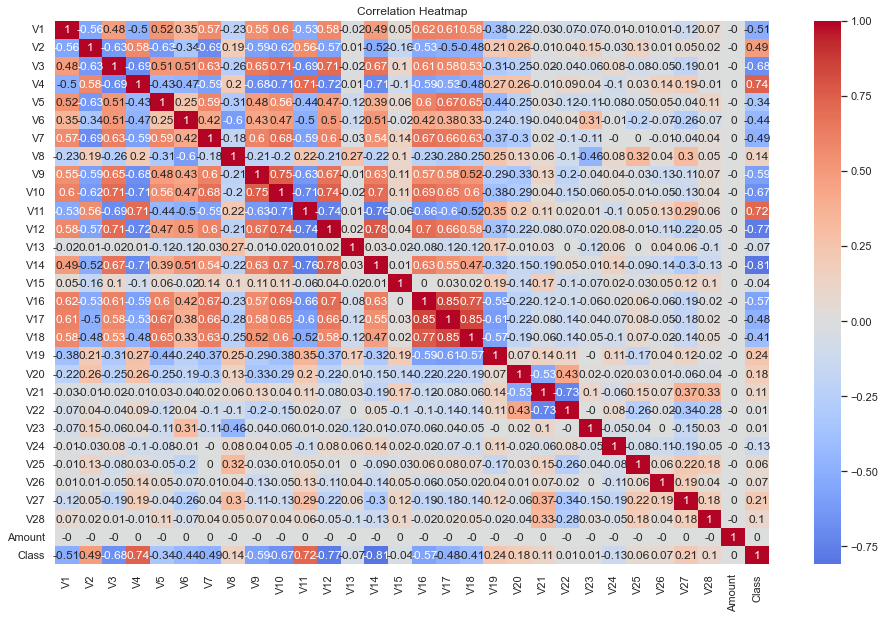

In [15]:
##Correlation exploration

plt.figure(figsize=(16, 10))  
correlation_matrix = df.corr().round(2)  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
##Interested in seeing the highest uniquely correlated values, that are not correlated with themselves of course
correlation_matrix = df.corr().round(4)

##Get the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

## Find the pairs of features with the highest unique correlations (not equal to 1)
highest_correlations = upper_triangle.unstack().sort_values(ascending=False)
highest_correlations = highest_correlations[highest_correlations < 1]

print("Highest unique correlations:")
print(highest_correlations)

Highest unique correlations:
V18    V17    0.8514
V17    V16    0.8481
V14    V12    0.7839
V18    V16    0.7680
V10    V9     0.7485
               ...  
V22    V21   -0.7346
V12    V11   -0.7446
V14    V11   -0.7623
Class  V12   -0.7686
       V14   -0.8057
Length: 435, dtype: float64


## Model Preparation 

In [17]:
##Splitting the dataset into target and categorical variables

X = df.drop('Class', axis=1)  ##Features
y = df['Class']  ##Target variable

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
##Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
##Logistic regression model
model_lr = LogisticRegression()

In [21]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = model_lr.predict(X_test)

## Logistic Regression Model Performance

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print('----Logistic Regression Results----')
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

----Logistic Regression Results----
Accuracy: 0.96
Confusion Matrix:
[[55545  1249]
 [ 2777 54155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56794
           1       0.98      0.95      0.96     56932

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



## Random Forest Classifier Performance

In [46]:
##Random forest classifier
classifier_rf = RandomForestClassifier(n_estimators=20, random_state=42)

##Using subsample to boost processing time given DataFrame contains > 500 000 rows
subsample_fraction = 0.1
X_train_subsample, _, y_train_subsample, _ = train_test_split(X_train, y_train, train_size=subsample_fraction, random_state=42)

##Train the classifier on the subsample
classifier_rf.fit(X_train_subsample, y_train_subsample)

##Make predictions on the test set
y_pred = classifier_rf.predict(X_test)

##Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('----Random Forest Results----')
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

----Random Forest Results----
Accuracy: 1.00
Confusion Matrix:
[[56733    61]
 [  192 56740]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56794
           1       1.00      1.00      1.00     56932

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



## Model Optimization 

In [25]:
##Using grid search to optimize hyperparameters of the logistic regression model


##Define the hyperparameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l2']}

##Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Create a GridSearch object
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

##Fit the GridSearch object to the data
grid_search.fit(X_train_scaled, y_train)

##Print the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

##Get the best estimator (model) with the optimal parameters
best_logreg = grid_search.best_estimator_

##Make predictions on the test set
y_pred = best_logreg.predict(X_test_scaled)

##Evaluate the model
print('----Optimized Logistic Regression Results----')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
----Optimized Logistic Regression Results----
Accuracy: 0.96
Confusion Matrix:
[[55547  1247]
 [ 2776 54156]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56794
           1       0.98      0.95      0.96     56932

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [26]:
##Optimized hyperparameters have shown to make no significant difference in the logistic regression model

In [48]:
##Random forest is providing 100% prediction accuracy on this dataset, but it's important to check if the 
##classifier is overfit to the dataset, having little real world value

#Let's check how the performance compares on the training data versus the test data

y_train_pred = classifier_rf.predict(X_train)

# Assess performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

y_test_pred = classifier_rf.predict(X_test)

# Assess performance on the validation/test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 1.00


###  They're equal, we can also plot the classifiers learning curves on the training and validation datasets. A large gap between the curves would indicate an overfitted model

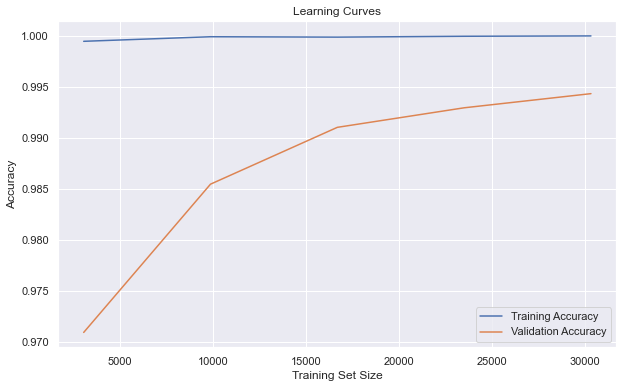

In [47]:
train_sizes, train_scores, test_scores = learning_curve(
    classifier_rf, X_train_subsample, y_train_subsample, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

### Without visualizing the learning curves, we can also check if the model is a good fit using the elif operator

In [49]:
##Analyze the learning curves
train_accuracy_mean = np.mean(train_scores, axis=1)
test_accuracy_mean = np.mean(test_scores, axis=1)

##Identify the index where the curves start to diverge
max_diff_index = np.argmax(train_accuracy_mean - test_accuracy_mean)

##Check for convergence by looking at the trend after the point of maximum difference
if np.all(test_accuracy_mean[max_diff_index:] >= test_accuracy_mean[max_diff_index]):
    print("The model is likely a good fit.")
elif train_accuracy_mean[max_diff_index] > test_accuracy_mean[max_diff_index]:
    print("The model is likely overfitting.")
else:
    print("The model is likely underfitting.")

The model is likely a good fit.


### We have also mathematically determined a good fitting model





# Conclusion

### We have succesfully created a classification model using a Random Forest Classifier that is performing with 100% accuracy without over or underfitting to the training dataset. 

### Throughout this project, I used a variety of packages to explore, clean, visualize, and create machine learning models to classify if a transaction is fraudulent or not based on 26 anonymized features. 
